In [2]:
import numpy as np
import pandas as pd
from scipy import sparse, io, stats

In [3]:
import re 
def sorted_nicely( l ): 
    """ Sort the given iterable in the way that humans expect.""" 
    convert = lambda text: int(text) if text.isdigit() else text 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)

In [124]:
df_2_or_agg = pd.read_hdf('/data/lohia/gene_distance_expresseion/dist_files/norm_dist_files/combined_dist_500_agg.h5' )

In [125]:
df_2_or_rao = pd.read_hdf('/data/lohia/gene_distance_expresseion/dist_files/norm_dist_files/combined_dist_500_rao.h5' )

In [126]:
df_2_or_rao_kr = pd.read_hdf('/data/lohia/gene_distance_expresseion/dist_files/norm_dist_files/combined_dist_with_georg_hic_rao_kr_vc_500.h5' )

In [127]:
df_2_or_rao_kr.rename(columns={"hi-c-rao": "VC_tss_median" }, inplace=True)

In [128]:
df_2_or_rao['pairs'] = [str(x)+"_"+str(y) for x,y in zip(df_2_or_rao['Gene stable ID_y'], df_2_or_rao['Gene stable ID_x'])]
df_2_or_rao.set_index('pairs', inplace=True)

df_2_or_agg['pairs'] = [str(x)+"_"+str(y) for x,y in zip(df_2_or_agg['Gene stable ID_y'], df_2_or_agg['Gene stable ID_x'])]
df_2_or_agg.set_index('pairs', inplace=True)

df_2_or_rao_kr['pairs'] = [str(x)+"_"+str(y) for x,y in zip(df_2_or_rao_kr['Gene stable ID_y'], df_2_or_rao_kr['Gene stable ID_x'])]
df_2_or_rao_kr.set_index('pairs', inplace=True)

In [129]:
subset_cols = list (set(df_2_or_rao.index) & set(df_2_or_agg.index) & set(df_2_or_rao_kr.index)) # I only care for genes subset for which expression ans tss is present        
df_2_or_agg = df_2_or_agg.loc[subset_cols, :]
df_2_or_rao = df_2_or_rao.loc[subset_cols, :]
df_2_or_rao_kr = df_2_or_rao_kr.loc[subset_cols, :]

In [130]:
chrm_list = []
net_type = []
corr = []
p_val = []
agg_method = []

            
change_group_level_1 = df_2_or_rao.groupby(['chrom_x'])
for network_type in ['VC_tss']:
    for chrm in sorted_nicely(change_group_level_1.groups.keys()): 
            df = change_group_level_1.get_group(chrm)
            #df = df[df['tss_tss'] >= 10000000] # liming the matrix to only chosen values for rank standerization
            #df = df.dropna(subset=[network_type])
            c = stats.pearsonr(df[network_type].to_numpy(), df['exp'].to_numpy() )
            chrm_list.append(chrm)
            net_type.append(network_type)
            corr.append(c[0])
            p_val.append(c[1])
            agg_method.append('rao')
            
change_group_level_1 = df_2_or_rao_kr.groupby(['chrom_x'])
for network_type in ['VC_tss_median']:
    for chrm in sorted_nicely(change_group_level_1.groups.keys()): 
            df = change_group_level_1.get_group(chrm)
            #df = df[df['tss_tss'] >= 10000000] # liming the matrix to only chosen values for rank standerization
            #df = df.dropna(subset=[network_type])
            c = stats.pearsonr(df[network_type].to_numpy(), df['exp'].to_numpy() )
            chrm_list.append(chrm)
            net_type.append(network_type)
            corr.append(c[0])
            p_val.append(c[1])
            agg_method.append('rao_kr')

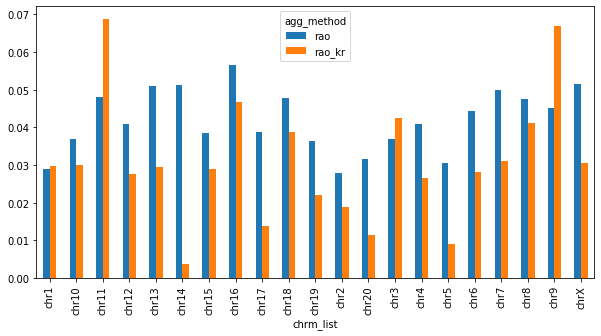

In [131]:
df = pd.DataFrame(list(zip(chrm_list, net_type, corr, p_val, agg_method)), 
               columns =['chrm_list', 'net_type', 'corr', 'p_val', 'agg_method']) 
df_melted = pd.pivot_table(df, values='corr', index=['chrm_list'],
                    columns=['agg_method'])
df_melted.plot.bar(figsize=(10,5))

In [144]:
chrm_list = []
net_type = []
corr = []
p_val = []
agg_method = []
change_group_level_1 = df_2_or_agg.groupby(['chrom_x'])
for network_type in ['VC_tss']:
    for chrm in sorted_nicely(change_group_level_1.groups.keys()): 
            df = change_group_level_1.get_group(chrm)
            #df = df[df['tss_tss'] >= 10000000] # liming the matrix to only chosen values for rank standerization
            #df = df.dropna(subset=[network_type])
            c = stats.pearsonr(df[network_type].to_numpy(), df['exp'].to_numpy() )
            chrm_list.append(chrm)
            net_type.append(network_type)
            corr.append(c[0])
            p_val.append(c[1])
            agg_method.append('agg')
            
change_group_level_1 = df_2_or_rao.groupby(['chrom_x'])
for network_type in ['VC_tss']:
    for chrm in sorted_nicely(change_group_level_1.groups.keys()): 
            df = change_group_level_1.get_group(chrm)
            #df = df[df['tss_tss'] >= 10000000] # liming the matrix to only chosen values for rank standerization
            #df = df.dropna(subset=[network_type])
            c = stats.pearsonr(df[network_type].to_numpy(), df['exp'].to_numpy() )
            chrm_list.append(chrm)
            net_type.append(network_type)
            corr.append(c[0])
            p_val.append(c[1])
            agg_method.append('rao')

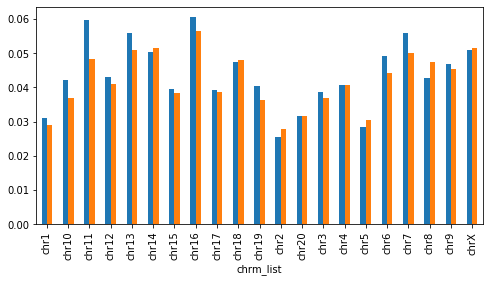

In [145]:
df_agg = pd.DataFrame(list(zip(chrm_list, net_type, corr, p_val, agg_method)), 
               columns =['chrm_list', 'net_type', 'corr', 'p_val', 'agg_method']) 
df_melted_agg = pd.pivot_table(df_agg, values='corr', index=['chrm_list'],
                    columns=['agg_method'])
df_melted_agg.plot.bar(figsize=(8,4), legend=False)

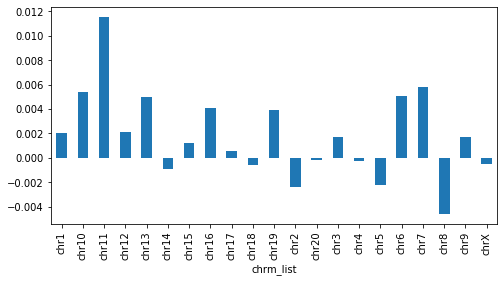

In [146]:
(df_melted_agg['agg'] - df_melted_agg['rao'] ).plot.bar(figsize=(8,4), legend=False)

In [ ]:
df_agg = pd.DataFrame(list(zip(chrm_list, net_type, corr, p_val, agg_method)), 
               columns =['chrm_list', 'net_type', 'corr', 'p_val', 'agg_method']) 
df_melted_agg = pd.pivot_table(df_agg, values='corr', index=['chrm_list'],
                    columns=['agg_method'])
df_melted_agg.plot.bar(figsize=(8,4), legend=False)

In [86]:
chrm_list = []
net_type = []
corr = []
p_val = []
agg_method = []
change_group_level_1 = df_2_or_agg.groupby(['chrom_x'])
for network_type in ['VC_tss', 'VC_max', 'VC_mean']:
    for chrm in sorted_nicely(change_group_level_1.groups.keys()): 
            df = change_group_level_1.get_group(chrm)
            #df = df[df['tss_tss'] >= 10000000] # liming the matrix to only chosen values for rank standerization
            #df = df.dropna(subset=[network_type])
            c = stats.pearsonr(df[network_type].to_numpy(), df['exp'].to_numpy() )
            chrm_list.append(chrm)
            net_type.append(network_type)
            corr.append(c[0])
            p_val.append(c[1])
            agg_method.append('agg')

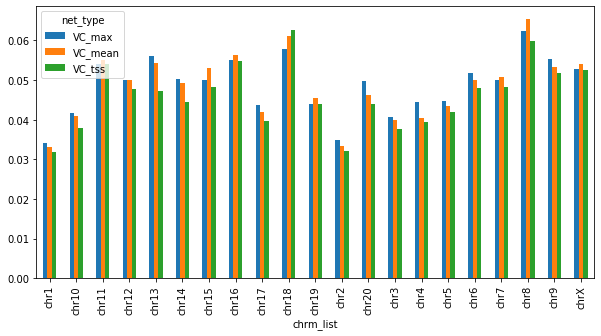

In [87]:
df_map = pd.DataFrame(list(zip(chrm_list, net_type, corr, p_val, agg_method)), 
               columns =['chrm_list', 'net_type', 'corr', 'p_val', 'agg_method']) 
df_melted_map = pd.pivot_table(df_map, values='corr', index=['chrm_list'],
                    columns=['net_type'])
df_melted_map.plot.bar(figsize=(10,5))

In [138]:
chrm_list = []
net_type = []
corr = []
p_val = []
agg_method = []
change_group_level_1 = df_2_or_agg.groupby(['chrom_x'])
for network_type in ['VC_rank_max', 'VC_max', 'VC_lib_max']:
    for chrm in sorted_nicely(change_group_level_1.groups.keys()): 
            df = change_group_level_1.get_group(chrm)
            df = df[df['tss_tss'] >= 10000000] # liming the matrix to only chosen values for rank standerization
            #df = df.dropna(subset=[network_type])
            c = stats.pearsonr(df[network_type].to_numpy(), df['exp'].to_numpy() )
            chrm_list.append(chrm)
            net_type.append(network_type)
            corr.append(c[0])
            p_val.append(c[1])
            agg_method.append('agg')

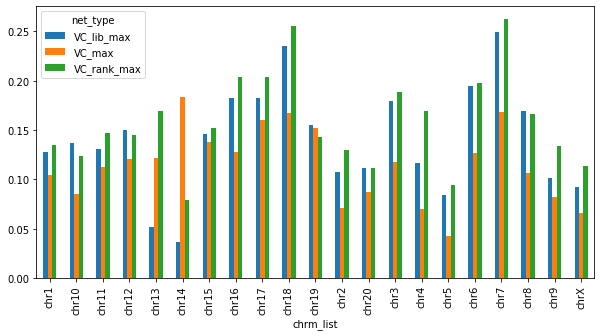

In [139]:
df_norm = pd.DataFrame(list(zip(chrm_list, net_type, corr, p_val, agg_method)), 
               columns =['chrm_list', 'net_type', 'corr', 'p_val', 'agg_method']) 
df_melted_norm = pd.pivot_table(df_norm, values='corr', index=['chrm_list'],
                    columns=['net_type'])
df_melted_norm.plot.bar(figsize=(10,5))

In [98]:
chrm_list = []
net_type = []
corr = []
p_val = []
agg_method = []
change_group_level_1 = df_2_or_rao.groupby(['chrom_x'])
for network_type in ['VC_rank_max', 'VC_max', 'VC_lib_max']:
    for chrm in sorted_nicely(change_group_level_1.groups.keys()): 
            df = change_group_level_1.get_group(chrm)
            #df = df[df['tss_tss'] >= 10000000] # liming the matrix to only chosen values for rank standerization
            #df = df.dropna(subset=[network_type])
            c = stats.pearsonr(df[network_type].to_numpy(), df['exp'].to_numpy() )
            chrm_list.append(chrm)
            net_type.append(network_type)
            corr.append(c[0])
            p_val.append(c[1])
            agg_method.append('agg')

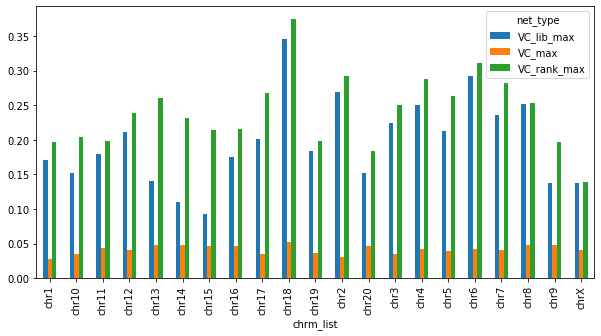

In [99]:
df_norm = pd.DataFrame(list(zip(chrm_list, net_type, corr, p_val, agg_method)), 
               columns =['chrm_list', 'net_type', 'corr', 'p_val', 'agg_method']) 
df_melted_norm = pd.pivot_table(df_norm, values='corr', index=['chrm_list'],
                    columns=['net_type'])
df_melted_norm.plot.bar(figsize=(10,5))